In [1]:
import numpy as np
import pandas as pd

In [2]:
# Dataset url: https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('Data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# checking missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Checking the unique value
df.target.unique()

array([1, 0])

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

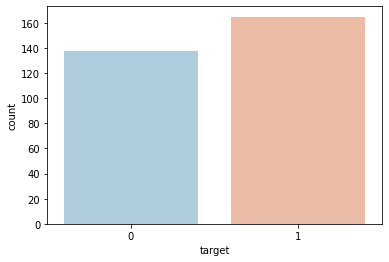

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'target', data = df, palette = 'RdBu_r')

So, our dataset is balanced.

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    #print('==============================')
    #print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

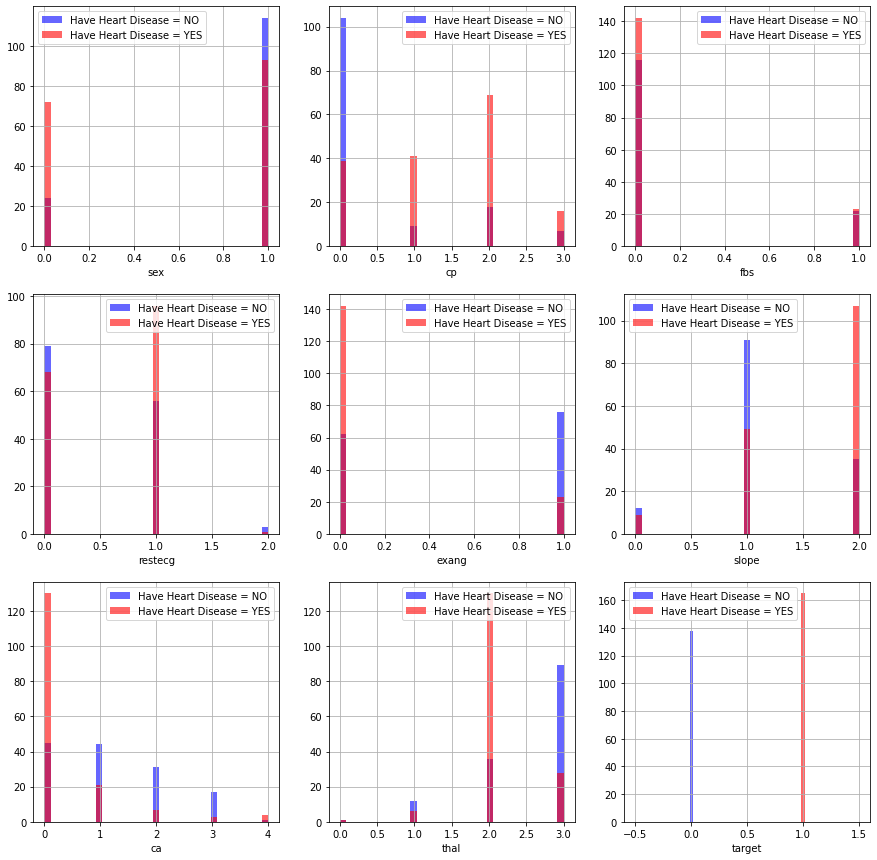

In [42]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    # 2nd arg of enumerate is 1 instead of default 0; otherwise: ValueError: num must be 1 <= num <= 9, not 0
    # print(i)  # 1 2 3 4 5 6 7 8 9
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    

Observations from the above plot:

1. cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
2. restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
3. exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)
4. slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
5. ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
6. thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

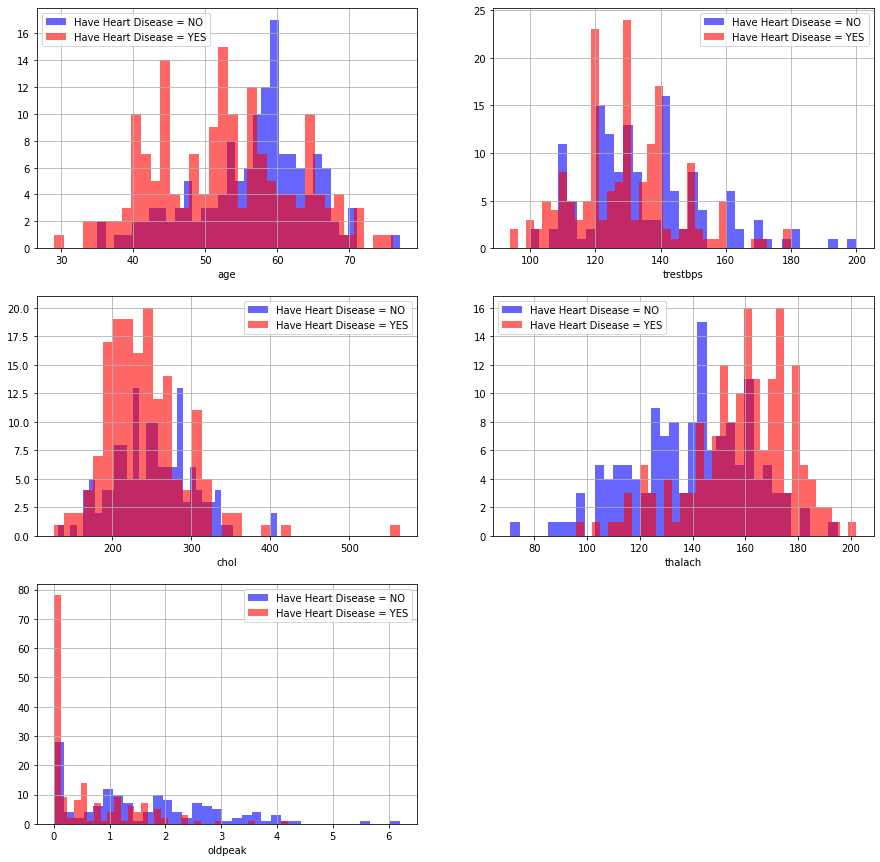

In [40]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    # print(i) # 1 2 3 4 5
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

1. trestbps: resting blood pressure anything above 130-140 is generally of concern
2. chol: greater than 200 is of concern.
3. thalach: People with a maximum of over 140 are more likely to have heart disease.
4. the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

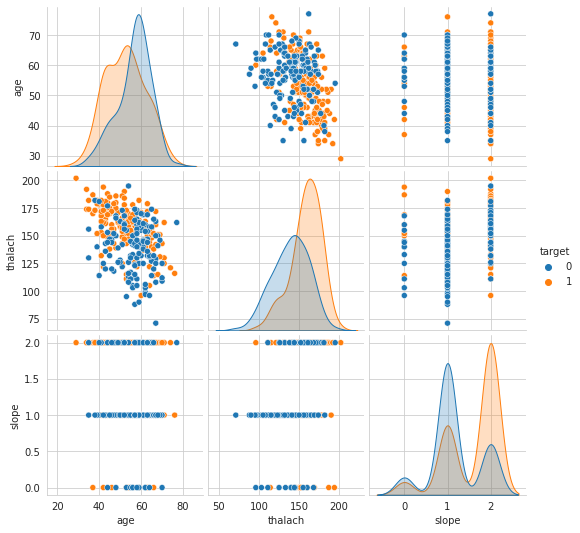

In [70]:
sns.pairplot(df[['age','thalach','slope','target']], hue='target')

<AxesSubplot:>

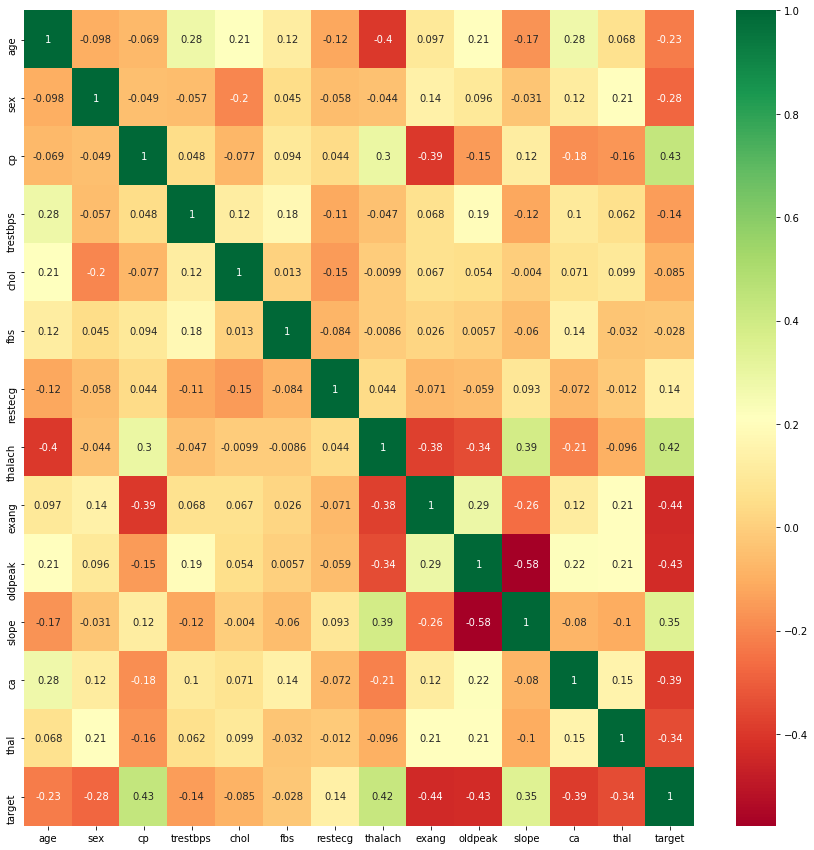

In [55]:
correlatin = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlatin, annot=True, cmap = 'RdYlGn')

<AxesSubplot:title={'center':'Correlation with target'}>

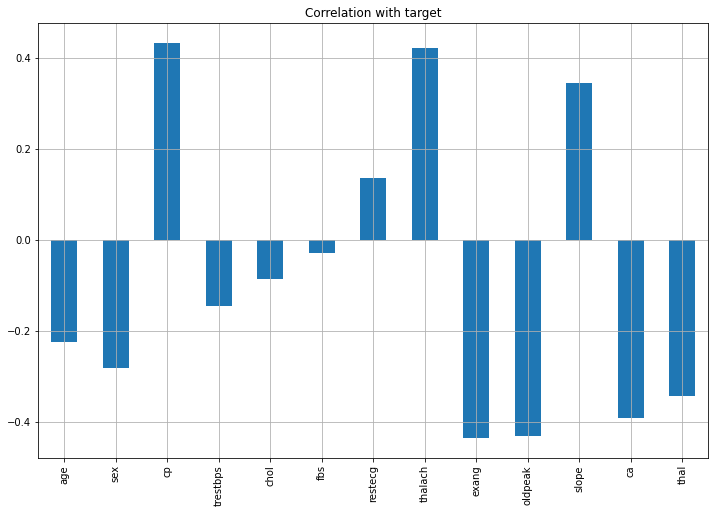

In [56]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

Observations from correlation:

1. fbs and chol are the least correlated with the target variable.
2. All other variables have a significant correlation with the target variable.

## Data Processing

In [10]:
# creating dummy columns for categorical variables:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

# scaling
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
# columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
columns_to_scale = continous_val
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [65]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Building Model

In [11]:
X = dataset.drop('target', axis=1)
y = dataset.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Putting models in a dictionary
models = {'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(), 
          'Random Forest': RandomForestClassifier()}

# Creating function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Making a list to keep model scores
    model_scores = {}
    # Looping through models
    for name, model in models.items():
        # Fitting the model to the data
        model.fit(X_train, y_train)
        # Evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [13]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8681318681318682,
 'Logistic Regression': 0.8571428571428571,
 'Random Forest': 0.8241758241758241}

### Model Comparison

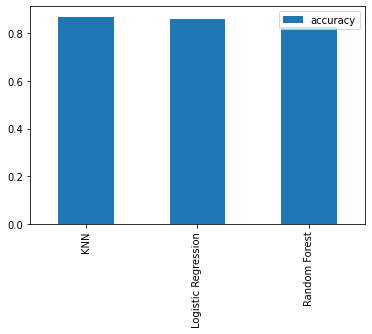

In [16]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter tuning and cross-validation

In [17]:
# KNN by hand

# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [18]:
train_scores

[1.0,
 0.8773584905660378,
 0.9009433962264151,
 0.8726415094339622,
 0.8679245283018868,
 0.8773584905660378,
 0.8773584905660378,
 0.8537735849056604,
 0.8443396226415094,
 0.8349056603773585,
 0.8490566037735849,
 0.8537735849056604,
 0.8584905660377359,
 0.839622641509434,
 0.839622641509434,
 0.839622641509434,
 0.8301886792452831,
 0.8301886792452831,
 0.8443396226415094,
 0.8207547169811321]

Maximum KNN score on the test data: 89.01%


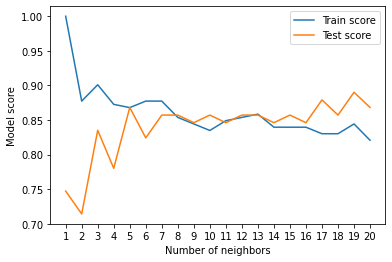

In [21]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 19 seems best.

### Tuning models with with RandomizedSearchCV

Among different hyperparameters, we can tune with RandomizedSearchCV both for LogisticRegression and RandomForest.

In [22]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [27]:
# Logistic Regression
from sklearn.model_selection import RandomizedSearchCV

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(X_test, y_test)

0.8571428571428571

In [24]:
# RandomForest

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [25]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [26]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8461538461538461

### Tuning a model with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.
<br><br>
In short:

* RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [32]:
from sklearn.model_selection import GridSearchCV

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [34]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8571428571428571

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

**Note:** If there are a large amount of hyperparameters combinations in grid, GridSearchCV may take a long time to try them all out. This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

### Evaluating a classification model, beyond accuracy

we'll use the GridSearchCV version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.

In [37]:
y_preds = gs_log_reg.predict(X_test)

### ROC Curve and AUC Scores

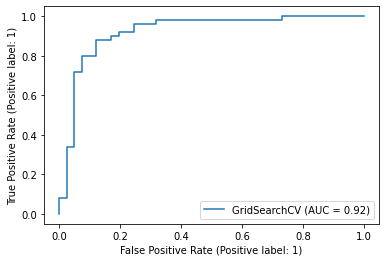

In [35]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

### Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[34  7]
 [ 6 44]]


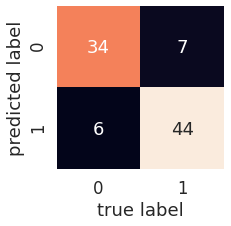

In [39]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



But these were all calculated using a single training and test set. We can make them more solid by calculating them using cross-validation. We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

In [43]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [44]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [45]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.86885246, 0.90163934, 0.83606557, 0.86666667, 0.76666667])

In [46]:
# taking average
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [47]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8463592205527689

In [48]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.884848484848485

In [49]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8641816271963331

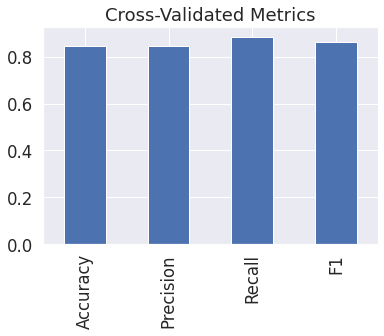

In [50]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature importance

In [51]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [52]:
# Check coef_
clf.coef_

array([[ 0.07269951, -0.07977681, -0.03884169,  0.27349176, -0.44605803,
         0.34039844, -0.38790053, -0.7399229 , -0.11386691,  0.50688863,
         0.29939909, -0.15183224,  0.10433016, -0.19963934,  0.2216363 ,
        -0.06949905,  0.37677444, -0.42427653, -0.05120898, -0.4090474 ,
         0.41275429,  1.05981837, -0.44213628, -0.50398126, -0.18769684,
         0.02649393,  0.02071703,  0.09979239,  0.52222305, -0.69023456]])

In [53]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.07269951428283486,
 'sex': -0.07977680977681928,
 'cp': -0.03884169082224142,
 'trestbps': 0.27349175708870654,
 'chol': -0.4460580337865402,
 'fbs': 0.3403984433102336,
 'restecg': -0.38790052845029127,
 'thalach': -0.7399229022921793,
 'exang': -0.11386690929233147,
 'oldpeak': 0.5068886326402274,
 'slope': 0.29939909380422347,
 'ca': -0.1518322443682232,
 'thal': 0.10433015922816498,
 'target': -0.19963933935110362}

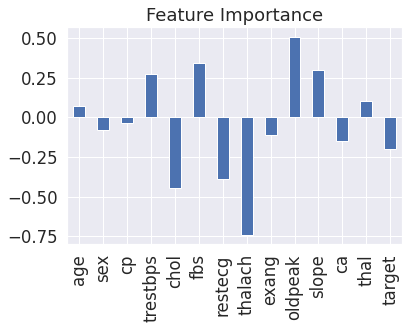

In [54]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);